In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import skew, kurtosis

from pandas_datareader import data as pdr
import yfinance as yf

import matplotlib.pyplot as plt
from datetime import datetime

yf.pdr_override()

# Specify the starting and ending dates for the time series
start = datetime(2017, 1, 1)
end  = datetime(2021, 1, 31)

# The first argument is the series we want, second and third are the starting and ending dates
#also get comparisons from competitors
lulu = pdr.get_data_yahoo('LULU', start, end)
nike = pdr.get_data_yahoo('NKE', start, end)
adidas = pdr.get_data_yahoo('ADS.DE', start, end)

# Select only the adjusted closing price data and convert them into a DataFrame

stocks = pd.DataFrame({'lulu': lulu['Adj Close'], 'nike': nike['Adj Close'], 'adidas': adidas['Adj Close']})
print(stocks)


# Presenting the summary statistics, rounding to 4 d.p.
# stats = round(stocks.describe(), 4)
# print(stats)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  lulu        nike      adidas
Date                                          
2017-01-02         NaN         NaN  136.749115
2017-01-03   66.849998   48.821365  134.896271
2017-01-04   69.410004   49.845123  132.320328
2017-01-05   68.730003   49.835735  130.422333
2017-01-06   68.269997   50.634079  130.874222
...                ...         ...         ...
2021-01-25  339.989990  135.072189  261.316681
2021-01-26  330.559998  132.666336  268.796783
2021-01-27  329.510010  128.659836  262.968170
2021-01-28  330.239990  132.293198  258.013794
2021-01-29  328.679993  131.183533  254.516617

[1053 rows x 3 columns]


In [2]:
# Presenting only the mean and std dev
aggregate = round(stocks.aggregate([np.mean, np.std]), 4)
print(aggregate)

          lulu     nike    adidas
mean  165.4930  78.7805  207.7511
std    95.3538  22.7582   44.7091


In [3]:
# Print the skewness and kurtosis of the stocks
skewness = round(stocks.skew(), 4)
print('Skewness of the stocks:')
print(skewness)
print('\n')

kurtosis = round(stocks.kurtosis(), 4)
print('Kurtosis of the stocks: ')
print(kurtosis)

Skewness of the stocks:
lulu      0.6801
nike      0.8359
adidas    0.3201
dtype: float64


Kurtosis of the stocks: 
lulu     -0.6029
nike      0.3287
adidas   -1.2499
dtype: float64


In [4]:
# Computing percentage change (simple returns) and round to 4 d.p.
daily_returns = stocks.pct_change()
monthly_returns = stocks.resample('M').ffill().pct_change()

# Drop na values
daily_returns = daily_returns.dropna()
monthly_returns = monthly_returns.dropna()
print(monthly_returns)

# Presenting the mean and std dev of daily and monthly returns
daily_stats = round(daily_returns.aggregate([np.mean, np.std]), 4)
print(daily_stats)

                lulu      nike    adidas
Date                                    
2017-02-28 -0.033328  0.080529  0.087539
2017-03-31 -0.205179 -0.021980  0.125631
2017-04-30  0.002506 -0.005742  0.031408
2017-05-31 -0.071731 -0.043674 -0.063764
2017-06-30  0.236171  0.117213 -0.014684
2017-07-31  0.033015  0.000847  0.150522
2017-08-31 -0.066353 -0.102600 -0.023057
2017-09-30  0.081668 -0.018178  0.015115
2017-10-31 -0.011888  0.060559 -0.001829
2017-11-30  0.088603  0.098745 -0.082963
2017-12-31  0.173686  0.038691 -0.045947
2018-01-31 -0.004835  0.090648  0.120550
2018-02-28  0.036952 -0.017444 -0.025094
2018-03-31  0.098890 -0.005804  0.076944
2018-04-30  0.119838  0.029350  0.036867
2018-05-31  0.052605  0.049861 -0.024053
2018-06-30  0.188482  0.112849 -0.034349
2018-07-31 -0.039247 -0.034764  0.011768
2018-08-31  0.291621  0.071414  0.136135
2018-09-30  0.048796  0.030657 -0.018613
2018-10-31 -0.133916 -0.114259 -0.013751
2018-11-30 -0.058125  0.004037 -0.063462
2018-12-31 -0.08

In [5]:
monthly_stats = round(monthly_returns.aggregate([np.mean, np.std]), 4)
print(monthly_stats)

        lulu    nike  adidas
mean  0.0395  0.0227  0.0163
std   0.1135  0.0690  0.0708


In [2]:
# Plotting Bar Chart for monthly returns all 3 stocks
daily_returns.mean().plot(kind='bar', title='Daily Returns Plot of Bar Charts for lulu,NKE and ADS.GE');
#lulu/NKE/ADS.GE

NameError: name 'daily_returns' is not defined

<AxesSubplot:title={'center':'Plot of Bar Charts for LULU, NKE, and ADS.GE'}>

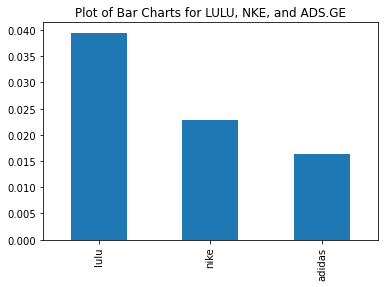

In [6]:
# Plotting Bar Chart for monthly returns all 3 stocks
monthly_returns.mean().plot(kind='bar', title='Plot of Bar Charts for LULU, NKE, and ADS.GE')

In [7]:
# Computing log return
log_return=np.log(stocks/stocks.shift(1))

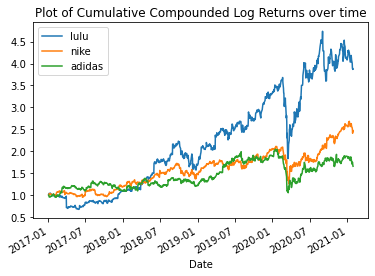

In [8]:
# Plotting the cumulative log returns (cum_return) over time; use the cumprod() method to compute            
log_return = log_return.replace(np.nan, 0)
cum_comp_log_return = (1 + log_return).cumprod()

# Plotting the cumulative returns of all stocks
cum_comp_log_return.plot(title = 'Plot of Cumulative Compounded Log Returns over time')
plt.show()

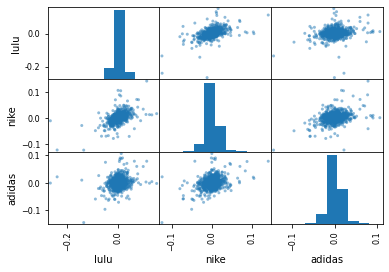

In [9]:
# Plotting the histogram and scatter plot
pd.plotting.scatter_matrix(log_return, diagonal='hist');

In [10]:
# Compute and print the correlation matrix, and round up to 4 decimal places
correl=round(log_return.corr(),4)
print('The correlation matrix of the 3 stocks:')
print(correl)

The correlation matrix of the 3 stocks:
         lulu    nike  adidas
lulu    1.000  0.5000  0.2130
nike    0.500  1.0000  0.3666
adidas  0.213  0.3666  1.0000


In [11]:
#obtaining data on stocks and market return from Yahoo

In [22]:
# Import relevant packages
import pandas as pd
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.stats.diagnostic as sd

from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

# Specify the starting and ending dates for the time series
start = datetime(2022, 1, 1)
end  = datetime(2022, 12, 31)

# The first argument is the series we want, second and third are the starting and ending dates
lulu = pdr.get_data_yahoo('LULU', start, end)
nike = pdr.get_data_yahoo('NKE', start, end)
adidas = pdr.get_data_yahoo('ADS.DE', start, end)

lulu_ret = lulu.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis=1).pct_change()
lulu_ret = lulu_ret.rename(columns = {"Date": "Date", "Adj Close":"LULURet"})

nike_ret= nike.pct_change()
nike_ret = nike_ret.rename(columns = {"Date": "Date", "Adj Close":"NKERet"})

adidas_ret= adidas.pct_change()
adidas_ret = adidas_ret.rename(columns = {"Date": "Date", "Adj Close":"ADSDERet"})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#compute beta using market-model regressions

In [23]:
# Combining the data
combined = pd.merge(adidas_ret, nike_ret, on='Date')
combined = pd.merge(combined, lulu_ret, on='Date')
   
# Descriptive statistics
combined.describe()

# OLS regrssion of ADSDE against LULU
reg1 = smf.ols(formula='ADSDERet ~ LULURet',data=combined).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               ADSDERet   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     30.51
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           8.39e-08
Time:                        17:13:49   Log-Likelihood:                 537.27
No. Observations:                 249   AIC:                            -1071.
Df Residuals:                     247   BIC:                            -1064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0022      0.002     -1.246      0.2

/Users/nirelibarra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


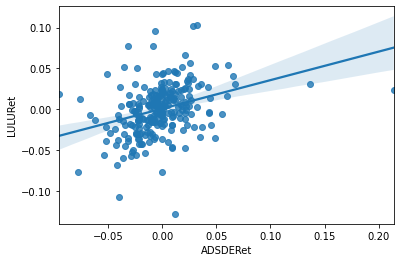

In [24]:
import seaborn as sns

# Plotting regression line of ADS DE against LULU
plot1 = sns.regplot('ADSDERet', 'LULURet', data=combined)

In [25]:
# OLS regression of NKE against LULU
reg2 = smf.ols(formula='NKERet ~ LULURet',data=combined).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 NKERet   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     258.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.46e-40
Time:                        17:15:50   Log-Likelihood:                 638.45
No. Observations:                 249   AIC:                            -1273.
Df Residuals:                     247   BIC:                            -1266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0008      0.001     -0.651      0.5

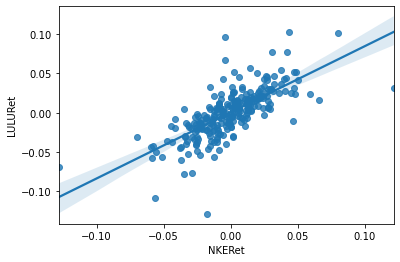

In [27]:
# Plotting regression line of NKE against LULU
plot2 = sns.regplot('NKERet', 'LULURet', data=combined)